# Error for GLV dynamics

Define errors in $x$ and $\beta$ direction:

> $\mathrm{err}_x = 1 - \frac{x(\beta_\mathrm{eff})}{x_\mathrm{eff}}$

> $\mathrm{err}_\beta = 1 - \frac{\beta(x_\mathrm{eff})}{\beta_\mathrm{eff}}$

For the GLV, the coincide:

> $x(\beta_\mathrm{eff}) = - \frac{\alpha}{\beta_\mathrm{eff}}$, 

such that 

> $ \mathrm{err} = 1 + \frac{\alpha}{x_\mathrm{eff} \beta_\mathrm{eff}}$ .

Inserting the definitions of $x_\mathrm{eff}$ and $\beta_\mathrm{eff}$ from Gao et al.'s paper, 

> $ x_\mathrm{eff} = \frac{\sum_{ij} A_{ij} x_j}{\sum_{mn} A_{mn}}  $, 

> $ \beta_\mathrm{eff} = \frac{\sum_{ijk} A_{ij} A_{jk} }{\sum_{mn} A_{mn}} $, 

we get 

> $
    \mathrm{err} = 1 + \frac{
        \alpha \left(\sum_{mn} A_{mn}\right) \left(\sum_{mn} A_{mn}\right) 
        }{
        - \alpha \left( \sum_{ijk} A_{ij} {A^{-1}}_{jk} \right) \left(\sum_{ijk} A_{ij} A_{jk}\right) 
        }
        = 1 - \frac{\sum_{ijkl} A_{ij} A_{kl} }{ S \sum_{ijk} A_{ij} A_{jk} }
$


Now, if all entries are drawn independently from one distribution, $A_{ij} \sim p(\mu, \sigma^2)$,
one can calculate the expected value 

> $\mathbb{E}\left[ \mathrm{err} \right] 
    = 1 - \mathbb{E} \left[\frac{\sum_{ijkl} A_{ij} A_{kl} }{ S \sum_{ijk} A_{ij} A_{jk} }\right]   $ .
    
This cannot be calculated directly. If, however, we assume the denominator ot be much larger than zero, we might be able to approximate by taking the expected values separately -- this is what we shall test numerically. However, doing this separation yields

> $ \mathbb{E} \left[ \sum_{ijkl} A_{ij} A_{kl} \right]
    = \mathbb{E} \left[
    \sum_{(i, j) \ne (k, l)} A_{ij} A_{jk} + \sum_{(i, j)} A_{ij}^2 \right]
    = (S^4  - S^2) \mu^2 + S^2(\sigma^2 + \mu^2)
    = S^2(S^2 \mu^2 + \sigma^2)
$

and

> $ \mathbb{E} \left[ \sum_{ijk} A_{ij} A_{jk} \right] 
    = \mathbb{E} \left[\sum_{j, i \ne k} A_{ij} A_{jk} + \sum_{j \ne i} A_{ij} A_{ji} + \sum_{i} A_{ii}^2 \right]
    = S^2 (S - 1) \mu^2 + S (S - 1) \mu^2 + S (\sigma^2 + \mu ^ 2) 
    = S(S^2 \mu^2 + \sigma^2) $

which gives 

> $ 1 - \frac{ \mathbb{E} \left[ \sum_{ijkl} A_{ij} A_{kl} \right]} 
{S \mathbb{E} \left[ \sum_{ijk} A_{ij} A_{jk} \right]}
= 1 - \frac{S^2(S^2 \mu^2 + \sigma^2)}{S^2 (S^2 \mu^2 + \sigma^2)} = 0 $.

So, either this approximation does not hold or higher order terms are important.

## Test results numerically for $A_{ij} > 0$ iid (lognormal) 

In [1]:
from __future__ import print_function
import numpy as np

% matplotlib inline 
import matplotlib.pyplot as plt
from imp import reload
import style as style; reload(style)
colors = style.colors

In [7]:
S_min = 20
S_max = 120
S_step = 10
Ss = np.arange(S_min, S_max + S_step, S_step)

S_c = np.linspace(10, S_max, 200)


n_samples = 500
mu_normal       = 0.
sigma_normal    = 1.

errs = np.zeros((len(Ss), n_samples)) 
for k, S in enumerate(Ss):
    print("Calculate error for S = %d"%S)
    for i in range(n_samples):
        # Sample A
        A = np.random.lognormal(mean=mu_normal, sigma=sigma_normal, size=(S, S))

        # Calculate err
        num = np.einsum('ij, kl ->', A, A)
        den = S * np.einsum('ij, jk -> ', A, A)
        errs[k, i] = 1. - num / den

Calculate error for S = 20
Calculate error for S = 30
Calculate error for S = 40
Calculate error for S = 50
Calculate error for S = 60
Calculate error for S = 70
Calculate error for S = 80
Calculate error for S = 90
Calculate error for S = 100
Calculate error for S = 110
Calculate error for S = 120


In [8]:
# Calculate measured and empirical means
means, stds = np.mean(errs, axis=1), np.std(errs, axis=1)

mu      = np.exp(mu_normal + sigma_normal**2 / 2.)
sigma   = np.sqrt((np.exp(sigma_normal**2) - 1.) * np.exp(2 * mu_normal + sigma_normal**2))
mean_theo = lambda S: 0. * S
std_theo = lambda S:  np.sqrt(+ 1. / (S**3 * (mu / sigma)**4))

print("mean(err)_measured   std(err)_theo  std(err)_measured")
for mean, S , std in zip(means, Ss, stds):
    if mean < 0:
        print("%.6f            %.6f       %.6f"%(mean, std_theo(S), std))
    else:
        print(" %.6f            %.6f       %.6f"%(mean, std_theo(S), std))


mean(err)_measured   std(err)_theo  std(err)_measured
 0.000091            0.019211       0.019345
 0.000361            0.010457       0.010001
-0.000233            0.006792       0.006727
 0.000101            0.004860       0.004861
-0.000146            0.003697       0.003625
-0.000180            0.002934       0.002843
 0.000089            0.002401       0.002426
 0.000065            0.002012       0.001918
 0.000074            0.001718       0.001730
-0.000103            0.001489       0.001497
-0.000007            0.001307       0.001340


/home/fs/Code/env2_7/local/lib/python2.7/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


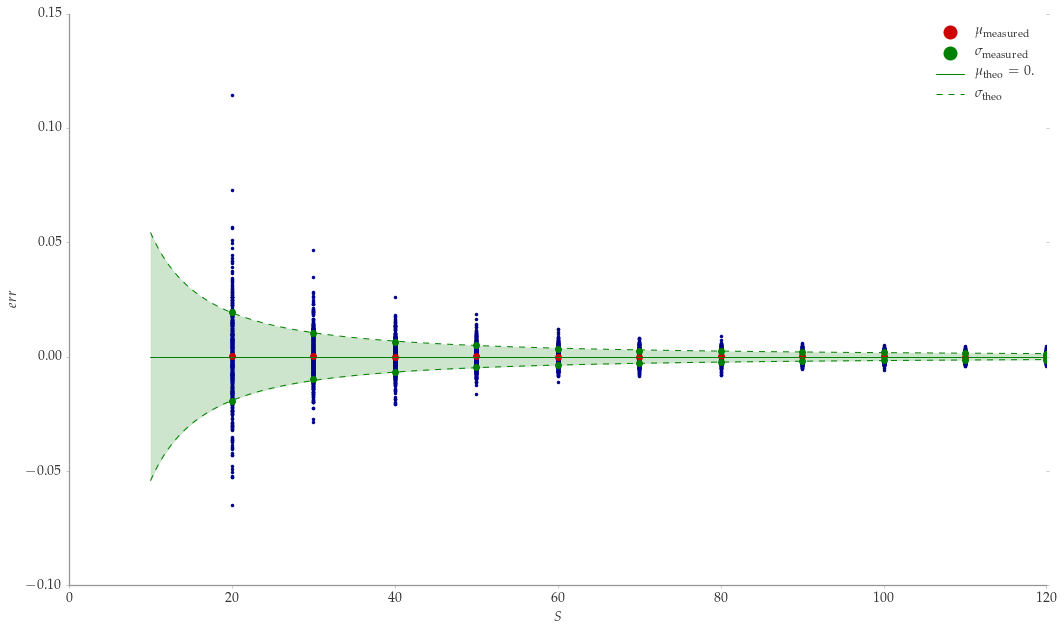

In [9]:
# Plotting
fig = plt.figure(figsize=(15, 9))
ax = style.add_subplot(fig, n_rows_cols=(1, 1), index_row_col=(0, 0), rowspan=1, colspan=1)

for k, S in enumerate(Ss):
    ax.plot([S]*n_samples, errs[k], '.', color=colors[0])

# Empirical means and std devs
ax.plot(Ss, means, 'o', color=colors[1], label=r"$\mu_\mathrm{measured}$")
ax.plot(Ss, means + stds, 'o', color=colors[2], label=r"$\sigma_\mathrm{measured}$")
ax.plot(Ss, means - stds, 'o', color=colors[2])

# Theoretical means and std devs
ax.plot(S_c, mean_theo(S_c), '-', color=colors[2], label=r"$\mu_\mathrm{theo} = 0.$")
ax.plot(S_c, mean_theo(S_c) + std_theo(S_c), '--', color=colors[2], label=r"$\sigma_\mathrm{theo}$")
ax.plot(S_c, mean_theo(S_c) - std_theo(S_c), '--', color=colors[2])
ax.fill_between(S_c, mean_theo(S_c) + std_theo(S_c), mean_theo(S_c) - std_theo(S_c), color=colors[2], alpha=0.2)

ax.set_xlabel("$S$")
ax.set_ylabel("$err$")
ax.set_xlim(0, S_max)
ax.legend(loc='best')
style.fixticks(fig)

## Non-zero mean but possibly negative random variables

In [14]:
S_min = 20
S_max = 120
S_step = 10
Ss = np.arange(S_min, S_max + S_step, S_step)

S_c = np.linspace(10, S_max, 200)

n_samples = 500
mu      = 1.
sigma   = 1.

errs = np.zeros((len(Ss), n_samples)) 
for k, S in enumerate(Ss):
    print("Calculate error for S = %d"%S)
    for i in range(n_samples):
        # Sample A
        A = np.random.normal(loc=mu, scale=sigma, size=(S, S))

        # Calculate err
        num = np.einsum('ij, kl ->', A, A)
        den = S * np.einsum('ij, jk -> ', A, A)
        errs[k, i] = 1. - num / den

Calculate error for S = 20
Calculate error for S = 30
Calculate error for S = 40
Calculate error for S = 50
Calculate error for S = 60
Calculate error for S = 70
Calculate error for S = 80
Calculate error for S = 90
Calculate error for S = 100
Calculate error for S = 110
Calculate error for S = 120


In [15]:
# Calculate measured and empirical means
means, stds = np.mean(errs, axis=1), np.std(errs, axis=1)

mean_theo = lambda S: 0. * S
std_theo = lambda S:  np.sqrt(+ 1. / (S**3 * (mu / sigma)**4))

print("mean(err)_measured   std(err)_theo  std(err)_measured")
for mean, S , std in zip(means, Ss, stds):
    if mean < 0:
        print("%.6f            %.6f       %.6f"%(mean, std_theo(S), std))
    else:
        print(" %.6f            %.6f       %.6f"%(mean, std_theo(S), std))


mean(err)_measured   std(err)_theo  std(err)_measured
 0.000532            0.011180       0.010676
-0.000044            0.006086       0.006022
-0.000071            0.003953       0.003818
 0.000171            0.002828       0.002789
 0.000117            0.002152       0.002138
-0.000038            0.001707       0.001779
 0.000013            0.001398       0.001364
 0.000024            0.001171       0.001162
 0.000042            0.001000       0.001019
 0.000013            0.000867       0.000894
-0.000007            0.000761       0.000759


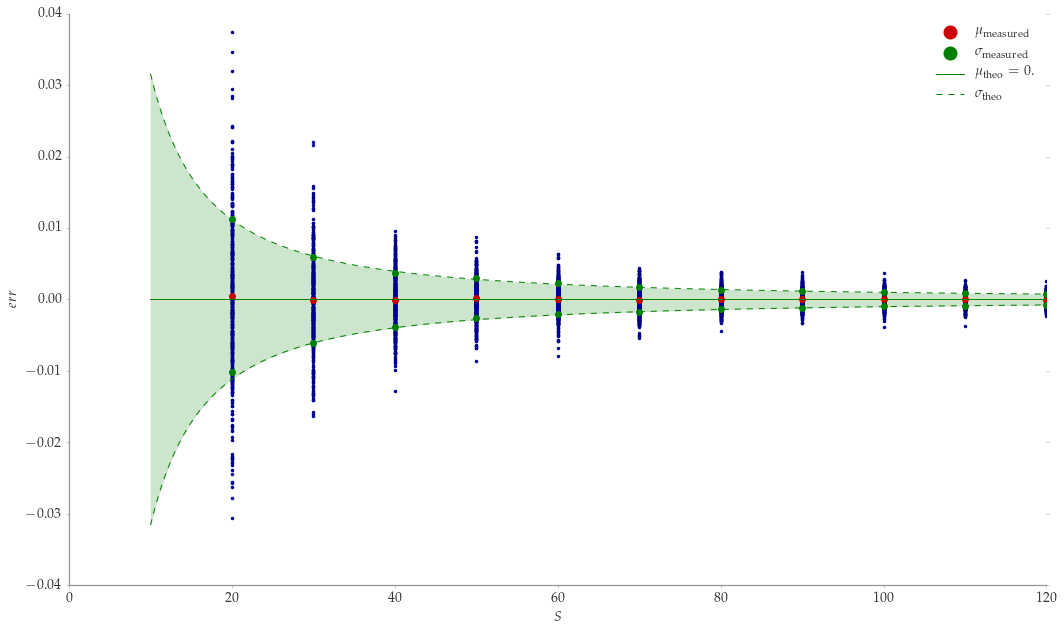

In [16]:
# Plotting
fig = plt.figure(figsize=(15, 9))
ax = style.add_subplot(fig, n_rows_cols=(1, 1), index_row_col=(0, 0), rowspan=1, colspan=1)

for k, S in enumerate(Ss):
    ax.plot([S]*n_samples, errs[k], '.', color=colors[0])

# Empirical means and std devs
ax.plot(Ss, means, 'o', color=colors[1], label=r"$\mu_\mathrm{measured}$")
ax.plot(Ss, means + stds, 'o', color=colors[2], label=r"$\sigma_\mathrm{measured}$")
ax.plot(Ss, means - stds, 'o', color=colors[2])

# Theoretical means and std devs
ax.plot(S_c, mean_theo(S_c), '-', color=colors[2], label=r"$\mu_\mathrm{theo} = 0.$")
ax.plot(S_c, mean_theo(S_c) + std_theo(S_c), '--', color=colors[2], label=r"$\sigma_\mathrm{theo}$")
ax.plot(S_c, mean_theo(S_c) - std_theo(S_c), '--', color=colors[2])
ax.fill_between(S_c, mean_theo(S_c) + std_theo(S_c), mean_theo(S_c) - std_theo(S_c), color=colors[2], alpha=0.2)

ax.set_xlabel("$S$")
ax.set_ylabel("$err$")
ax.set_xlim(0, S_max)
ax.legend(loc='best')
style.fixticks(fig)